In [7]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
## pip install pmdarima
from pmdarima.arima import auto_arima

In [8]:
#conversão dos atributos que estão no formato string para o formato ano-mês
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('dados/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

C:\Users\Arnal\AppData\Local\Temp\ipykernel_11316\618998660.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('dados/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)


In [9]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


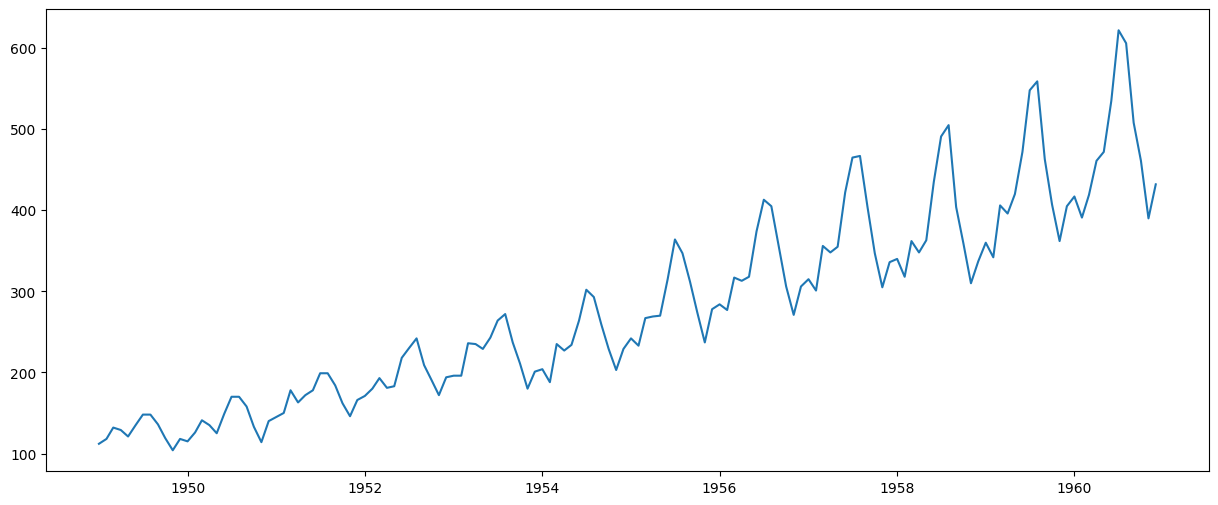

In [5]:
plt.plot(data)

In [10]:
stepwise_model = auto_arima(data, start_p=1,start_q=1,start_d= 0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.07 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.24 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.17 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.44 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.17 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.27 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.68 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.13 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.44 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.31 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=1.11 sec
 ARIM

In [11]:
#1019.1780567487502
print(stepwise_model.aic())

1012.990796557732


In [12]:
train = data.loc['1949-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [13]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [14]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [15]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [16]:
future_forecast = stepwise_model.predict(n_periods=12)

In [17]:
future_forecast

1960-01-01    420.237146
1960-02-01    398.452663
1960-03-01    461.899850
1960-04-01    450.680475
1960-05-01    473.993955
1960-06-01    537.915249
1960-07-01    612.229087
1960-08-01    623.584773
1960-09-01    520.159227
1960-10-01    462.309605
1960-11-01    412.920741
1960-12-01    453.737029
Freq: MS, dtype: float64

In [18]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Passengers"])

<Axes: xlabel='Month'>

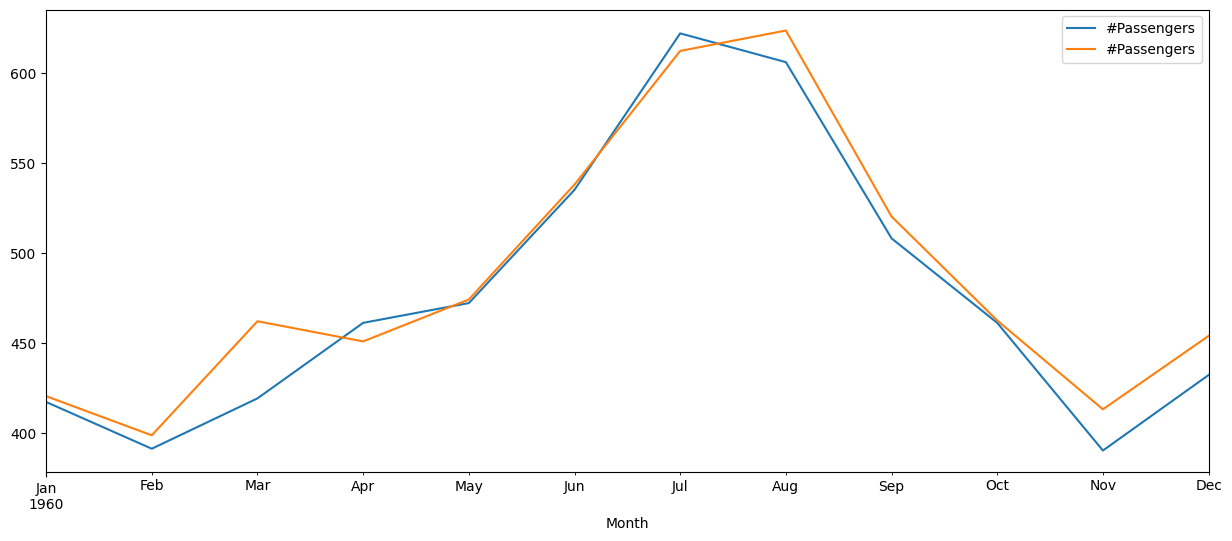

In [19]:
#azul test laranja forecast
pd.concat([test,future_forecast],axis=1).plot()

<Axes: xlabel='Month'>

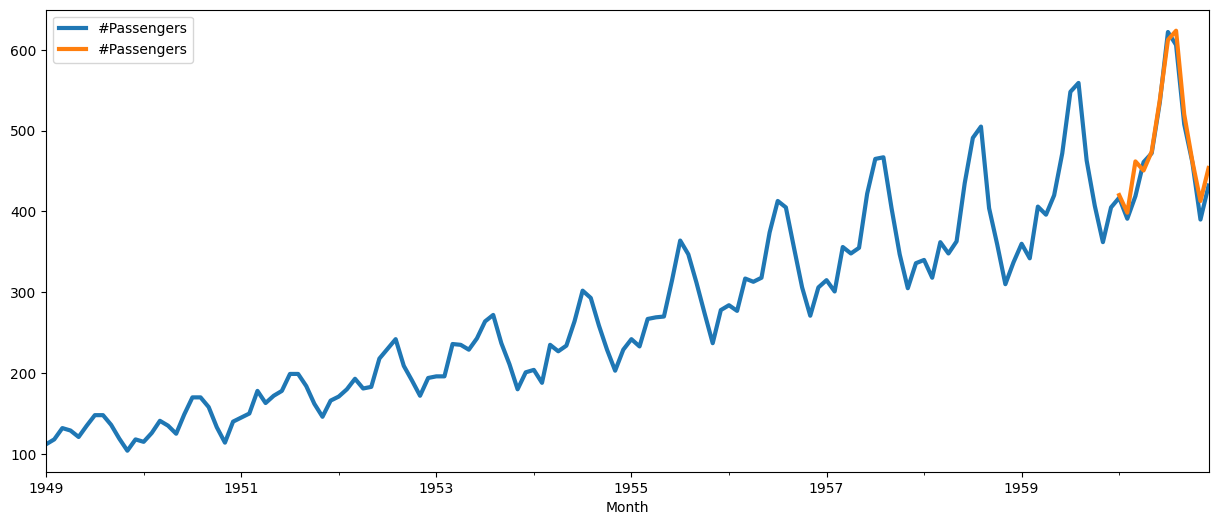

In [20]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=3)